In [1]:
#import packages
import pandas as pd
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## *Step 1*: Read the data into a pandas dataframe for data manipulation and analyis

In [2]:
df = pd.read_csv('Crime_Data.csv')
df.head(10)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
1,1976000069169,01/01/1976,1.0,01/31/1976,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
2,1979000049118,01/28/1979,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
5,19880000507482,09/29/1988,155.0,09/29/1988,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE
6,19930000465323,10/08/1993,2213.0,10/08/1993,2213.0,HOMICIDE,HOMICIDE-PREMEDITATED-GUN,SOUTH,R,R2,CLAREMONT/RAINIER VISTA
7,19940000264046,06/08/1994,0.0,06/12/1994,844.0,THEFT-ALL OTHER,THEFT-OTH,SOUTHWEST,F,F1,HIGH POINT
8,19960000543964,12/08/1996,1130.0,12/08/1996,1700.0,CAR PROWL,THEFT-CARPROWL,SOUTH,O,O1,SODO
9,19990000333737,NaN,NaN,01/01/1999,NaN,THEFT-SHOPLIFT,THEFT-SHOPLIFT,UNKNOWN,NaN,NaN,UNKNOWN


## *Step 2*: Clean and examine the data for a more accurate analysis

In [3]:
#get column names
column_names = df.columns
print(column_names)

Index([u'Report Number', u'Occurred Date', u'Occurred Time', u'Reported Date',
       u'Reported Time', u'Crime Subcategory', u'Primary Offense Description',
       u'Precinct', u'Sector', u'Beat', u'Neighborhood'],
      dtype='object')


In [4]:
#get column datatypes
df.dtypes

Report Number                    int64
Occurred Date                   object
Occurred Time                  float64
Reported Date                   object
Reported Time                  float64
Crime Subcategory               object
Primary Offense Description     object
Precinct                        object
Sector                          object
Beat                            object
Neighborhood                    object
dtype: object

In [5]:
#drop columns I don't plan on using
df = df.drop(['Occurred Time', 'Reported Time', 'Sector', 'Beat'], axis=1)

In [6]:
df.head()

,Report Number,Occurred Date,Reported Date,Crime Subcategory,Primary Offense Description,Precinct,Neighborhood
0,1975000079415,12/16/1975,12/16/1975,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,LAKEWOOD/SEWARD PARK
1,1976000069169,01/01/1976,01/31/1976,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,UNKNOWN
2,1979000049118,01/28/1979,02/09/1979,CAR PROWL,THEFT-CARPROWL,EAST,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,08/22/1981,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,02/15/1981,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,ROXHILL/WESTWOOD/ARBOR HEIGHTS


In [7]:
#reexamining the dataframe after dropping those columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523590 entries, 0 to 523589
Data columns (total 7 columns):
Report Number                  523590 non-null int64
Occurred Date                  523588 non-null object
Reported Date                  523590 non-null object
Crime Subcategory              523328 non-null object
Primary Offense Description    523590 non-null object
Precinct                       523584 non-null object
Neighborhood                   523590 non-null object
dtypes: int64(1), object(6)
memory usage: 28.0+ MB


**From my observation, we have a lot of categorial data to work with.**

In [8]:
#looking for duplicate rows (there are none)
duplicatesdf = df[df.duplicated()]
print(duplicatesdf)

Empty DataFrame
Columns: [Report Number, Occurred Date, Reported Date, Crime Subcategory, Primary Offense Description, Precinct, Neighborhood]
Index: []


In [9]:
#checking if any columns contain na values
df.isna().any()

Report Number                  False
Occurred Date                   True
Reported Date                  False
Crime Subcategory               True
Primary Offense Description    False
Precinct                        True
Neighborhood                   False
dtype: bool

In [10]:
#dropping rows with NaN values
df = df.dropna()

In [11]:
#change column names for easier data manipulation
df=df.rename(columns = {'Report Number':'report_num', 'Occurred Date':'occurred_date',
                        'Reported Date':'reported_date', 'Crime Subcategory':'crime_subcategory',
                       'Primary Offense Description':'primary_offense_descript'})

In [12]:
#showing array of unique Precincts
df.Precinct.unique()

array(['SOUTH', 'UNKNOWN', 'EAST', 'SOUTHWEST', 'WEST', 'NORTH'],
      dtype=object)

In [13]:
#showing array of unique Neighborhoods
df.Neighborhood.unique()

array(['LAKEWOOD/SEWARD PARK', 'UNKNOWN', 'CENTRAL AREA/SQUIRE PARK',
       'BRIGHTON/DUNLAP', 'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'SLU/CASCADE',
       'CLAREMONT/RAINIER VISTA', 'HIGH POINT', 'SODO',
       'DOWNTOWN COMMERCIAL', 'FIRST HILL',
       'JUDKINS PARK/NORTH BEACON HILL', 'NORTH ADMIRAL', 'MILLER PARK',
       'HILLMAN CITY', 'MORGAN', 'SOUTH PARK', 'MONTLAKE/PORTAGE BAY',
       'CAPITOL HILL', 'NORTHGATE', 'LAKECITY', 'NEW HOLLY',
       'RAINIER BEACH', 'QUEEN ANNE', 'RAINIER VIEW', 'BELLTOWN',
       'ROOSEVELT/RAVENNA', 'ALASKA JUNCTION', 'GREENWOOD',
       'PIONEER SQUARE', 'NORTH BEACON HILL', 'GEORGETOWN',
       'SOUTH DELRIDGE', 'HIGHLAND PARK', 'BITTERLAKE', 'MOUNT BAKER',
       'MADRONA/LESCHI', 'COLUMBIA CITY', 'NORTH DELRIDGE', 'FREMONT',
       'MID BEACON HILL', 'BALLARD NORTH', 'BALLARD SOUTH',
       'PHINNEY RIDGE', 'SANDPOINT', 'MAGNOLIA', 'UNIVERSITY',
       'CHINATOWN/INTERNATIONAL DISTRICT', 'WALLINGFORD',
       'EASTLAKE - WEST', 'SOUTH BEACON H

In [14]:
#showing unique crime subcategories
df.crime_subcategory.unique()

array(['BURGLARY-RESIDENTIAL', 'SEX OFFENSE-OTHER', 'CAR PROWL',
       'HOMICIDE', 'MOTOR VEHICLE THEFT', 'THEFT-ALL OTHER', 'DUI',
       'AGGRAVATED ASSAULT-DV', 'RAPE', 'AGGRAVATED ASSAULT',
       'ROBBERY-STREET', 'BURGLARY-COMMERCIAL', 'THEFT-BICYCLE',
       'NARCOTIC', 'PROSTITUTION', 'ARSON', 'PORNOGRAPHY',
       'ROBBERY-COMMERCIAL', 'FAMILY OFFENSE-NONVIOLENT',
       'THEFT-SHOPLIFT', 'WEAPON', 'THEFT-BUILDING',
       'ROBBERY-RESIDENTIAL', 'TRESPASS', 'LIQUOR LAW VIOLATION',
       'DISORDERLY CONDUCT', 'GAMBLE', 'LOITERING',
       'BURGLARY-COMMERCIAL-SECURE PARKING',
       'BURGLARY-RESIDENTIAL-SECURE PARKING'], dtype=object)

In [15]:
#showing unique primary offenses assigned to each report
df.primary_offense_descript.unique()

array(['BURGLARY-FORCE-RES', 'SEXOFF-INDECENT LIBERTIES',
       'THEFT-CARPROWL', 'HOMICIDE-PREMEDITATED-WEAPON', 'VEH-THEFT-AUTO',
       'HOMICIDE-PREMEDITATED-GUN', 'THEFT-OTH', 'DUI-LIQUOR',
       'ASSLT-AGG-DV-BODYFORCE', 'RAPE-STRONGARM', 'SEXOFF-OTHER',
       'ASSLT-AGG-GUN', 'ROBBERY-STREET-BODYFORCE',
       'ASSLT-AGG-POLICE-GUN', 'ASSLT-AGG-WEAPON',
       'BURGLARY-FORCE-NONRES', 'HOMICIDE-PREMEDITATED-BODYFORCE',
       'BURGLARY-NOFORCE-RES', 'VEH-THEFT-MTRCYCLE', 'THEFT-PKPOCKET',
       'THEFT-BICYCLE', 'NARC-POSSESS-MARIJU', 'PROSTITUTION',
       'ARSON-VEHICLE', 'ASSLT-AGG-CHILD-BODYFORCE',
       'PORNOGRAPHY-OBSCENE MATERIAL', 'ROBBERY-STREET-GUN',
       'SEXOFF-PEEPER', 'ROBBERY-BANK-BODYFORCE',
       'ROBBERY-BUSINESS-BODYFORCE', 'ROBBERY-BUSINESS-WEAPON',
       'ASSLT-AGG-DV-WEAPON', 'THEFT-LICENSE PLATE', 'CHILD-OTHER',
       'SEXOFF-OTHER OBJECT', 'ROBBERY-BUSINESS-GUN',
       'ASSLT-AGG-BODYFORCE', 'NARC-POSSESS-COCAINE',
       'ASSLT-AGG-POLICE-BODY

## *Step 3*: Time to start analyzing the data we have left for patterns and information about crime in Seattle.

How many reports are there for each crime subcategory?

In [16]:
print(df['crime_subcategory'].value_counts())

CAR PROWL                              148263
THEFT-ALL OTHER                         54419
THEFT-SHOPLIFT                          48637
BURGLARY-RESIDENTIAL                    46843
MOTOR VEHICLE THEFT                     43526
BURGLARY-COMMERCIAL                     23531
THEFT-BUILDING                          21437
TRESPASS                                17722
NARCOTIC                                17380
AGGRAVATED ASSAULT                      15640
DUI                                     12837
ROBBERY-STREET                          11882
THEFT-BICYCLE                           11091
BURGLARY-RESIDENTIAL-SECURE PARKING      8852
AGGRAVATED ASSAULT-DV                    6922
FAMILY OFFENSE-NONVIOLENT                6855
SEX OFFENSE-OTHER                        6396
WEAPON                                   4987
ROBBERY-COMMERCIAL                       4660
PROSTITUTION                             3609
RAPE                                     2022
LIQUOR LAW VIOLATION              

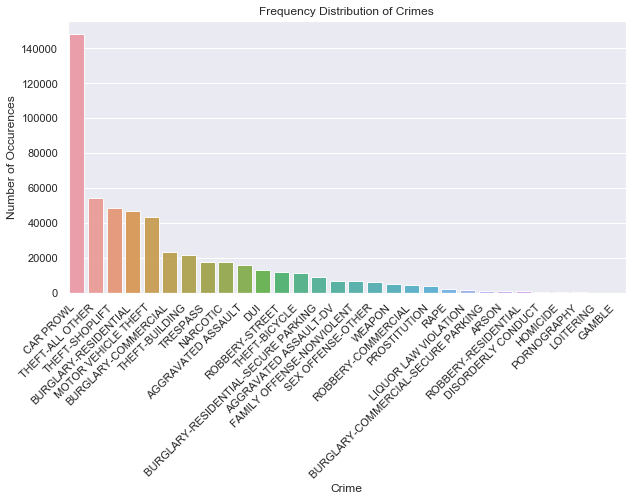

In [17]:
crime_count = df['crime_subcategory'].value_counts()
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
chart = sns.barplot(crime_count.index, crime_count.values, alpha=0.9)
plt.title('Frequency Distribution of Crimes')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Crime', fontsize=12)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

How does the type of crime vary by Precinct?

In [18]:
neighborhood_df = pd.crosstab(df["crime_subcategory"], df["Precinct"])
neighborhood_df

Precinct,EAST,NORTH,SOUTH,SOUTHWEST,UNKNOWN,WEST
crime_subcategory,,,,,,
AGGRAVATED ASSAULT,2697,3738,2726,1264,158,5057
AGGRAVATED ASSAULT-DV,1105,1835,1837,1032,58,1055
ARSON,145,369,215,137,4,201
BURGLARY-COMMERCIAL,2967,8190,3559,2119,32,6664
BURGLARY-COMMERCIAL-SECURE PARKING,195,270,43,53,1,602
BURGLARY-RESIDENTIAL,6910,18264,10035,6403,70,5161
BURGLARY-RESIDENTIAL-SECURE PARKING,2044,3467,112,511,7,2711
CAR PROWL,20853,48222,18671,13195,662,46660
DISORDERLY CONDUCT,41,45,34,12,1,150


In [23]:
crime_group = df.groupby(['crime_subcategory', 'primary_offense_descript'])
crime_group.size()

crime_subcategory                    primary_offense_descript        
AGGRAVATED ASSAULT                   ASSLT-AGG-BODYFORCE                   3655
                                     ASSLT-AGG-CHILD-BODYFORCE              143
                                     ASSLT-AGG-GUN                         1695
                                     ASSLT-AGG-POLICE-BODYFORCE              89
                                     ASSLT-AGG-POLICE-GUN                    27
                                     ASSLT-AGG-POLICE-WEAPON                294
                                     ASSLT-AGG-WEAPON                      9737
AGGRAVATED ASSAULT-DV                ASSLT-AGG-DV-BODYFORCE                2756
                                     ASSLT-AGG-DV-GUN                       212
                                     ASSLT-AGG-DV-WEAPON                   3954
ARSON                                ARSON-BUSINESS                         150
                                     ARSON-OTHER  

**Creating a dictionary to encode crime subcategories into numeric values.**

In [20]:
labels = df['crime_subcategory'].astype('category').cat.categories.tolist()
# print(labels)
replace_map = {'crime_subcategory' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map)

{'crime_subcategory': {'BURGLARY-RESIDENTIAL-SECURE PARKING': 7, 'BURGLARY-RESIDENTIAL': 6, 'ROBBERY-RESIDENTIAL': 22, 'SEX OFFENSE-OTHER': 24, 'LOITERING': 15, 'LIQUOR LAW VIOLATION': 14, 'AGGRAVATED ASSAULT': 1, 'ROBBERY-STREET': 23, 'RAPE': 20, 'HOMICIDE': 13, 'TRESPASS': 29, 'THEFT-ALL OTHER': 25, 'THEFT-BUILDING': 27, 'THEFT-BICYCLE': 26, 'ROBBERY-COMMERCIAL': 21, 'BURGLARY-COMMERCIAL-SECURE PARKING': 5, 'PORNOGRAPHY': 18, 'GAMBLE': 12, 'DUI': 10, 'ARSON': 3, 'AGGRAVATED ASSAULT-DV': 2, 'BURGLARY-COMMERCIAL': 4, 'NARCOTIC': 17, 'FAMILY OFFENSE-NONVIOLENT': 11, 'PROSTITUTION': 19, 'CAR PROWL': 8, 'THEFT-SHOPLIFT': 28, 'MOTOR VEHICLE THEFT': 16, 'DISORDERLY CONDUCT': 9, 'WEAPON': 30}}


In [21]:
df_crime_replace = df.copy()

In [22]:
df_crime_replace.replace(replace_map, inplace=True)
df_crime_replace.head()

,report_num,occurred_date,reported_date,crime_subcategory,primary_offense_descript,Precinct,Neighborhood
0,1975000079415,12/16/1975,12/16/1975,6,BURGLARY-FORCE-RES,SOUTH,LAKEWOOD/SEWARD PARK
1,1976000069169,01/01/1976,01/31/1976,24,SEXOFF-INDECENT LIBERTIES,UNKNOWN,UNKNOWN
2,1979000049118,01/28/1979,02/09/1979,8,THEFT-CARPROWL,EAST,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,08/22/1981,13,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,02/15/1981,6,BURGLARY-FORCE-RES,SOUTHWEST,ROXHILL/WESTWOOD/ARBOR HEIGHTS
